In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("E:/Projects/Learning/ML/Housing Prices Prediction/train.csv").drop("Id", axis=1)
test_df = pd.read_csv("E:/Projects/Learning/ML/Housing Prices Prediction/test.csv")
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train_df.shape, test_df.shape)

(1460, 80) (1459, 80)


In [4]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
# train_df.isna().sum().plot(kind='bar', figsize=(15, 5), title="Missing Data by Columns")
# plt.show()

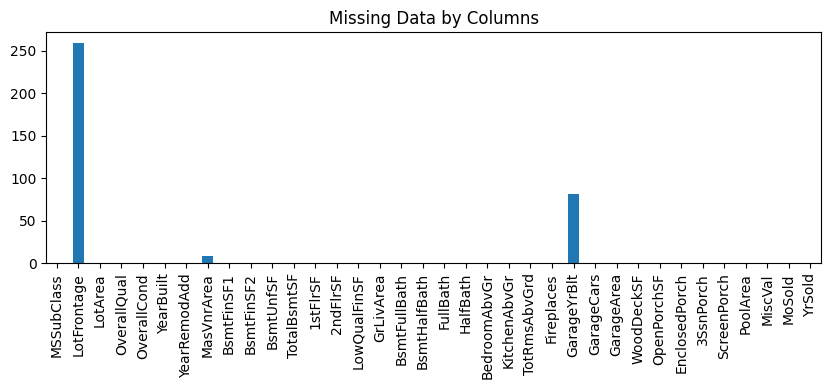

In [6]:
numerical_features = []
for col in train_df.columns:
    if train_df[col].dtype in ['int64', 'float64'] and col != 'SalePrice':
        numerical_features.append(col)

train_df[numerical_features].isna().sum().plot(kind='bar', figsize=(10, 3), title="Missing Data by Columns")
plt.show()

for feature in numerical_features:
    if train_df[feature].isna().sum() != 0:
        numerical_features.remove(feature)

X = train_df[numerical_features]
y = train_df.SalePrice
test_X = test_df[numerical_features]
test_X = test_X.fillna(-1)

In [7]:
def rf_rmse(max_depth, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=200, max_depth=max_depth, random_state=1)
    model.fit(train_X, train_y)
    predictions = model.predict(val_X)
    rmse = np.sqrt(mean_squared_error(predictions, val_y))
    return rmse
    
def gbm_rmse(train_X, val_X, train_y, val_y):
    model = GradientBoostingRegressor(n_estimators=100, random_state=1)
    model.fit(train_X, train_y)
    predictions = model.predict(val_X)
    rmse = np.sqrt(mean_squared_error(predictions, val_y))
    return rmse
    
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.1, random_state=1)

In [8]:
gbm_error = gbm_rmse(train_X, val_X, train_y, val_y)
rf_error = rf_rmse(20, train_X, val_X, train_y, val_y)

print(f"Validation RMSE for GradientBoostionRegressor: {gbm_error}")
print(f"Validation RMSE for RandomForestRegressor: {rf_error}")

Validation RMSE for GradientBoostionRegressor: 20504.04739315632
Validation RMSE for RandomForestRegressor: 21474.794814905898


In [9]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=1)
rf_model.fit(train_X, train_y)
rf_preds = rf_model.predict(test_X)

gbm_model = GradientBoostingRegressor(n_estimators=200, random_state=1)
gbm_model.fit(train_X, train_y)
gbm_preds = gbm_model.predict(test_X)

final_preds = (rf_preds + gbm_preds) / 2

In [10]:
# output = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': final_preds})
# output.to_csv("Submission.csv", index=False)